<h1 align="center"><b>EDA:</b> PCOS</h1>

El Síndrome de Ovario Poliquístico (PCOS) es un trastorno hormonal que afecta a mujeres en edad reproductiva. Se caracteriza por un desequilibrio hormonal, especialmente por niveles elevados de andrógenos, y en muchos casos, por la presencia de quistes en los ovarios.

Este síndrome puede provocar ciclos menstruales irregulares, problemas de fertilidad, acné, aumento de peso, entre otros síntomas.

En este proyecto de Análisis Exploratorio de Datos (EDA), el objetivo es comprender mejor los factores y patrones asociados al PCOS, analizando variables como la edad, la dieta, el ejercicio y los niveles hormonales, con el fin de identificar posibles relaciones y tendencias.

Para ello, se analizará un dataset extraído de <b>Kaggle</b> llamado Diet, Exercise, and PCOS Insights y se importarán las siguientes librerías.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
pcos = pd.read_csv('Cleaned-Data.csv')
pcos

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,...,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication
0,20-25,66.0,157.48,Unmarried,No,No,Yes,No,No,No,...,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,Somewhat,No.
1,Less than 20,56.0,165.10,Unmarried,No,No,No,No,No,No,...,0,No,Daily,No Exercise,Less than 30 minutes,6-8 hours,No,No,Somewhat,No.
2,Less than 20,89.0,167.64,Unmarried,No,Yes,No,No,No,Yes,...,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.
3,20-25,55.0,160.02,Unmarried,No,Yes,No,Yes,No,Yes,...,1,No,Never,No Exercise,Not Applicable,6-8 hours,Yes,No,Somewhat,No.
4,Less than 20,55.0,160.02,Unmarried,No,No,No,No,No,No,...,0,No,Daily,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,6-8 hours,Yes,No,Not at All,No.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Less than 20,49.0,157.48,Unmarried,No,No,No,Yes,No,Yes,...,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,6-8 hours,No,No,Somewhat,No.
169,20-25,90.0,170.18,Unmarried,Yes,No,Yes,Yes,No,No,...,0,No,3-4 Times a Week,High-intensity interval training (HIIT),30 minutes,6-8 hours,Yes,No,Somewhat,No.
170,20-25,49.0,162.56,Unmarried,Yes,Yes,Yes,Yes,Yes,Yes,...,1,No,Rarely,"Flexibility and balance (e.g., yoga, pilates)",Not Applicable,6-8 hours,No,No,Not Much,No.
171,Less than 20,52.0,124.46,Unmarried,No,No,Yes,Yes,No,No,...,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,Less than 6 hours,Yes,No,Somewhat,No.


<b>Fuente:</b> Kaggle - <i>Diet, Exercise and PCOS Insights</i>

Este conjunto de datos contiene 173 registros y 36 variables, enfocadas en analizar los hábitos de salud de mujeres que padecen o no el <b>Síndrome de Ovario Poliquístico (PCOS)</b>.

Las columnas proporcionan información detallada sobre diferentes aspectos físicos, médicos y de estilo de vida, entre ellos:

<b>Datos personales y físicos:</b> Age, Weight_kg, Height_ft, Marital_Status.

<b>Aspectos médicos:</b> PCOS, Family_History_PCOS, Menstrual_Irregularity, Hormonal_Imbalance, Hyperandrogenism, Hirsutism, Conception_Difficulty, Insulin_Resistance, Diabetes, Cardiovascular_Disease.

<b>Salud mental y antecedentes:</b> Mental_Health, Childhood_Trauma, Stress_Level.

<b>Hábitos alimenticios:</b> Diet_Bread_Cereals, Diet_Milk_Products, Diet_Fruits, Diet_Vegetables, Diet_Starchy_Vegetables, Diet_NonStarchy_Vegetables, Diet_Fats, Diet_Sweets, Diet_Fried_Food, Diet_Tea_Coffee, Diet_Multivitamin, Vegetarian.

<b>Ejercicio y estilo de vida:</b> Exercise_Frequency, Exercise_Type, Exercise_Duration, Exercise_Benefit, Sleep_Hours, Smoking.

<b>Tratamiento:</b> PCOS_Medication.

En conjunto, este dataset ofrece una visión integral de cómo los factores relacionados con la dieta, el ejercicio y la salud general pueden influir en la presencia o ausencia del <b>Síndrome de Ovario Poliquístico</b>.

Una vez obtenido el dataset, realizamos un análisis exploratorio inicial para identificar la información más relevante y comprender qué tipo de conclusiones podíamos extraer.
Durante esta etapa observamos que los datos podían agruparse en cuatro grandes categorías:

1. Factor genético

2. Factor alimenticio

2. Factor relacionado con el ejercicio

3. Factor asociado a los hábitos generales de las mujeres

A partir de esta clasificación, formulamos cuatro hipótesis, cada una correspondiente a una de las categorías identificadas.

<b>Primera hipótesis (factor genético):</b> se plantea si la genética influye en la probabilidad de padecer el síndrome de ovario poliquístico (PCOS).

<b>Segunda categoría (factor alimenticio):</b>  analiza si mantener una dieta equilibrada y saludable se asocia con una menor probabilidad de desarrollar PCOS.

<b>Tercera hipótesis (factor de ejercicio):</b>  explora si las mujeres que realizan ejercicio con mayor frecuencia presentan una menor probabilidad de sufrir PCOS.

<b>Cuarta hipótesis (hábitos generales):</b>  evalúa si mantener hábitos saludables —como dormir adecuadamente, reducir el estrés y evitar el tabaco— disminuye la probabilidad de padecer PCOS.

Una vez definidas las hipótesis, comenzamos el proceso de análisis. Sin embargo, antes de avanzar, fue necesario verificar si el dataset contenía valores vacíos o faltantes.

In [67]:
#pcos.info()

El <b>data set</b> no tiene valores nulos, ya que tiene 173 registros y, según la información que nos aporta la función <b>info()</b>, todas las columnas contienen registros completos.

Una vez comprobado esto, comenzamos a limpiar la tabla. Para ello, vamos a extraer los datos que nos interesan para cada hipótesis y generar una tabla que nos permita analizar los datos.

En primer lugar, comenzamos con el apartado de <b>genética</b>. En él, agrupamos en una nueva tabla las siguientes columnas:

<b>Age:</b> Edad de la participante; puede influir en la aparición y gravedad del PCOS.

<b>Weight_kg:</b> Peso en kilogramos; útil para analizar la relación entre peso y PCOS.

<b>Height_ft:</b> Altura en pies; junto con el peso permite calcular el IMC.

<b>Family_History_PCOS:</b> Indica antecedentes familiares; refleja el factor genético.

<b>Menstrual_Irregularity:</b> Muestra si hay irregularidades menstruales, síntoma común del PCOS.

<b>Hormonal_Imbalance:</b> Señala desequilibrio hormonal, característica clave del síndrome.

<b>Hyperandrogenism:</b> Indica exceso de andrógenos; puede causar acné o vello excesivo.

<b>Hirsutism:</b> Presencia de vello excesivo en zonas no habituales; asociado al PCOS.

<b>Mental_Health:</b> Evalúa el estado emocional; el PCOS puede relacionarse con estrés o depresión.

<b>Insulin_Resistance:</b> Muestra si hay resistencia a la insulina, común en el PCOS.

<b>Diabetes:</b> Indica presencia de diabetes; puede estar vinculada a la resistencia a la insulina.

<b>Cardiovascular_Disease:</b> Señala enfermedades cardíacas; el PCOS puede aumentar su riesgo.

Una vez comprendida la estructura del <b>dataset</b>, procedimos a limpiar y preparar los datos. En primer lugar, se corrigió el formato de texto en las columnas clasificatorias, eliminando tabulaciones u otros caracteres innecesarios que podían dificultar la búsqueda y el procesamiento de la información.

A continuación, se convirtieron las variables categóricas que contenían los valores "<b>Yes</b>" y "<b>No</b>" en valores numéricos binarios (<b>1</b> y <b>0</b>, respectivamente), con el objetivo de facilitar el análisis estadístico y la modelización posterior.

Finalmente, se agruparon las variables continuas —<b>Age</b>, <b>Weight_kg</b> y <b>Height_ft</b>— en rangos o franjas, lo que permitió visualizar mejor la distribución de los datos y detectar posibles patrones o relaciones entre los distintos grupos.

In [68]:
#Los nombres de las columnas tienen una tabulacion al finalizar
pcos_limp = pcos
pcos_limp.columns = pcos_limp.columns.str.strip()

pd.DataFrame({'#': range(1, len(pcos.columns)+1), 'Nombre_Columna': pcos.columns})

def convertir_yes_no(df):
#Convierte todas las columnas de un DataFrame que contengan 'Yes'/'No' a 1/0.
#None (modifica el DataFrame directamente)
    for col in df.columns:
        if df[col].dtype == object:  # Solo revisa columnas tipo object
            if df[col].isin(['Yes', 'No']).any():  # Solo si hay 'Yes' o 'No'
                df[col] = df[col].map({'Yes': 1, 'No': 0})
#Cambiar los valores de la tabla a binario
convertir_yes_no(pcos_limp)

In [69]:
#Cambiar nombres de los indicadores
pcos_limp['Age']  = pcos_limp['Age'].replace('Less than 20', '0-20')
pcos_limp['Age']  = pcos_limp['Age'] .replace('45 and above', '45-100')
print(pcos_limp['Age'] .value_counts())
#Ordenar Age de menor a mayor
orden_edades = ['0-20', '20-25', '25-30', '30-35', '35-44', '45-100']
pcos_limp['Age']  = pd.Categorical(pcos['Age'], categories=orden_edades, ordered=True)
pcos_limp = pcos_limp.sort_values('Age').sort_index()

Age
20-25     102
0-20       57
45-100      4
35-44       4
25-30       4
30-35       2
Name: count, dtype: int64


In [70]:
#Asegurarme que no hay espacios ocultos...
pcos_limp['Weight_kg'] = pd.to_numeric(pcos_limp['Weight_kg'], errors='coerce')
#Ver que valores tengo de peso y que de altura
weight_counts = pcos_limp['Weight_kg'].value_counts().sort_index()
print(weight_counts)

#Quitar los espacios en blanco, cambiar las comas por puntos...
pcos_limp['Weight_kg'] = (pcos_limp['Weight_kg'].astype(str).str.replace(',', '.'))
pcos_limp['Weight_kg'] = pd.to_numeric(pcos_limp['Weight_kg'], errors='coerce')

#Limites
limite_num = [30, 50, 60, 70, 80, 90, 100, 120]
#Etiquetas
rangos = ['30-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-120']
#Agrupamiento
pcos_limp['Weight_Range'] = pd.cut(pcos_limp['Weight_kg'], bins=limite_num, labels=rangos, include_lowest=True, right=True)

#Eliminar de la tabla limpia la columna de pesos
pcos_limp.drop(columns=['Weight_kg'], inplace=True)

Weight_kg
36.0      1
37.0      1
38.0      3
38.5      1
39.0      2
40.0      3
41.0      1
42.0      5
43.0      4
44.0      1
45.0     10
46.0      1
47.0      7
47.5      1
48.0      1
49.0      7
50.0     10
51.0      5
52.0      5
53.0      4
54.0      8
54.5      1
55.0     13
56.0      6
56.6      1
57.0      3
58.0      2
59.0      4
60.0     12
61.0      1
62.0      2
63.0      3
64.0      2
65.0      7
66.0      2
67.0      2
68.0      4
69.0      2
70.0     11
71.0      1
72.0      1
73.0      1
75.0      1
78.0      1
79.0      1
80.0      1
83.0      1
84.0      1
86.0      1
87.0      1
89.0      1
90.0      1
115.0     1
Name: count, dtype: int64


In [71]:
pcos_limp['Height_ft'].value_counts(ascending=True)
#Agrupar los tamaños
#Asegurarnos de que la columna sea numérica
pcos_limp['Height_ft'] = pd.to_numeric(pcos_limp['Height_ft'], errors='coerce')

#Definir bins manualmente
bins = [120, 130, 140, 150, 160, 170, 180, 190]  # límites de los intervalos
labels = ['120-130', '130-140', '140-150', '150-160', '160-170', '170-180', '180-190']

#Crear columna con rangos
pcos_limp['Height_range'] = pd.cut(pcos_limp['Height_ft'], bins=bins, labels=labels, include_lowest=True)

#Eliminar la columna de alturas
pcos_limp.drop(columns=['Height_ft'], inplace=True)

In [72]:
mapping_conception = {
    'No' : 0,
    'Yes, not diagnosed by a doctor' : 1,
    'Yes, diagnosed by a doctor' : 1,
    'No, Yes, not diagnosed by a doctor' : 0 }

pcos_limp['Conception_Difficulty'] = pcos['Conception_Difficulty'].map(mapping_conception)

Con los valores limpios, se creó una nueva tabla en la que se almacenaron los datos seleccionados para el análisis, utilizando la columna <b>PCOS</b> como <b>índice</b>.

In [73]:
pcos_genetica = pcos_limp[['PCOS', 'Age','Height_range', 'Weight_Range', 'Family_History_PCOS', 'Hormonal_Imbalance', 'Hyperandrogenism', 'Hirsutism', 'Mental_Health', 'Conception_Difficulty', 'Insulin_Resistance', 'Diabetes', 'Cardiovascular_Disease']]
pcos_genetica = pcos_genetica.set_index('PCOS')
pcos_genetica

,Age,Height_range,Weight_Range,Family_History_PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Mental_Health,Conception_Difficulty,Insulin_Resistance,Diabetes,Cardiovascular_Disease
PCOS,,,,,,,,,,,,
0.0,20-25,150-160,60-70,0.0,0.0,0,0.0,1,NaN,0.0,0.0,0.0
0.0,0-20,160-170,50-60,0.0,0.0,0,0.0,0,NaN,0.0,0.0,0.0
0.0,0-20,160-170,80-90,1.0,0.0,0,1.0,1,NaN,0.0,0.0,0.0
0.0,20-25,160-170,50-60,1.0,1.0,0,1.0,1,NaN,0.0,0.0,0.0
0.0,0-20,160-170,50-60,0.0,0.0,0,0.0,1,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
0.0,0-20,150-160,30-50,0.0,1.0,0,1.0,1,NaN,1.0,0.0,0.0
1.0,20-25,170-180,80-90,0.0,1.0,0,0.0,1,NaN,0.0,0.0,0.0
1.0,20-25,160-170,30-50,1.0,1.0,1,1.0,1,NaN,0.0,0.0,0.0


La tabla se exportó a un nuevo <b>CSV</b> y comenzamos a trabajar en un <b>Jupyter Notebook</b> propio.

In [74]:
pcos_genetica.to_csv('pcos_genetica.csv')

Importamos el <b>CSV</b> y comenzamos a analizar los datos. Para ello, utilizamos la función <b>.mean()</b>, la cual calcula el valor promedio aritmético de un conjunto de datos.

In [75]:
#Para que nos coga los valores de PCOS
pcos_genetica = pcos_genetica.reset_index()
#Porcentaje de PCOS por rango de edad
pcos_age = pcos_genetica.groupby('Age')['PCOS'].mean() * 100
print("Porcentaje de PCOS por rango de edad:")
for grupo, valor in pcos_age.items():
    print(f"{grupo}: {valor:.2f}%")

# Porcentaje de PCOS por rango de altura
pcos_height = pcos_genetica.groupby('Height_range')['PCOS'].mean() * 100
print("\nPorcentaje de PCOS por rango de altura:")
for grupo, valor in pcos_height.items():
    print(f"{grupo}: {valor:.2f}%")
    
# Porcentaje de PCOS por rango de peso
pcos_weight = pcos_genetica.groupby('Weight_Range')['PCOS'].mean() * 100
print("Porcentaje de PCOS por rango de peso:")
for grupo, valor in pcos_weight.items():
    print(f"{grupo}: {valor:.2f}%")

Porcentaje de PCOS por rango de edad:
0-20: 10.71%
20-25: 27.45%
25-30: 75.00%
30-35: 50.00%
35-44: 0.00%
45-100: 0.00%

Porcentaje de PCOS por rango de altura:
120-130: 0.00%
130-140: nan%
140-150: 42.86%
150-160: 25.93%
160-170: 17.98%
170-180: 26.32%
180-190: 0.00%
Porcentaje de PCOS por rango de peso:
30-50: 17.24%
50-60: 10.94%
60-70: 36.11%
70-80: 71.43%
80-90: 50.00%
90-100: nan%
100-120: 0.00%


C:\Users\anear\AppData\Local\Temp\ipykernel_11528\2434908055.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_age = pcos_genetica.groupby('Age')['PCOS'].mean() * 100
C:\Users\anear\AppData\Local\Temp\ipykernel_11528\2434908055.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_height = pcos_genetica.groupby('Height_range')['PCOS'].mean() * 100
C:\Users\anear\AppData\Local\Temp\ipykernel_11528\2434908055.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

In [76]:
habit_cols = [
    "Family_History_PCOS", "Hormonal_Imbalance", "Hyperandrogenism",
    "Hirsutism", "Mental_Health", "Conception_Difficulty",
    "Insulin_Resistance", "Diabetes", "Cardiovascular_Disease"
]

for col in habit_cols:
    con = pcos_genetica[pcos_genetica[col] == 1]
    sin = pcos_genetica[pcos_genetica[col] == 0]
    
    if len(con) > 0:
        pcos_con = round(con["PCOS"].mean() * 100, 2)
    else:
        pcos_con = 0
    
    if len(sin) > 0:
        pcos_sin = round(sin["PCOS"].mean() * 100, 2)
    else:
        pcos_sin = 0

    print(f"{col}:")
    print(f"  % con PCOS: {pcos_con}%")
    print(f"  % sin PCOS: {pcos_sin}%\n")

# Total general
total_pcos = round(pcos_genetica["PCOS"].mean() * 100, 2)
total_no_pcos = 100 - total_pcos
print(f"Total dataset:")
print(f"  % con PCOS: {total_pcos}%")
print(f"  % sin PCOS: {total_no_pcos}%")


Family_History_PCOS:
  % con PCOS: 38.46%
  % sin PCOS: 19.31%

Hormonal_Imbalance:
  % con PCOS: 36.08%
  % sin PCOS: 4.11%

Hyperandrogenism:
  % con PCOS: 83.33%
  % sin PCOS: 12.16%

Hirsutism:
  % con PCOS: 50.0%
  % sin PCOS: 10.66%

Mental_Health:
  % con PCOS: 27.64%
  % sin PCOS: 8.16%

Conception_Difficulty:
  % con PCOS: 0%
  % sin PCOS: 0%

Insulin_Resistance:
  % con PCOS: 70.0%
  % sin PCOS: 15.89%

Diabetes:
  % con PCOS: 100.0%
  % sin PCOS: 20.83%

Cardiovascular_Disease:
  % con PCOS: 80.0%
  % sin PCOS: 20.48%

Total dataset:
  % con PCOS: 22.09%
  % sin PCOS: 77.91%


In [ ]:
pcos_vals = []
no_pcos_vals = []

for col in habit_cols:
    con = pcos_genetica[pcos_genetica[col] == 1]
    
    media = con["PCOS"].mean()
    if np.isnan(media):   # si la media es NaN, asignamos 0
        pcos_con = 0
    else:
        pcos_con = int(round(media * 100))
        
    pcos_vals.append(pcos_con)
    no_pcos_vals.append(100 - pcos_con)

Una vez realizado el <b>análisis</b> y contrastadas las <b>hipótesis</b>, elaboramos un <b>gráfico</b> para representar visualmente los resultados.

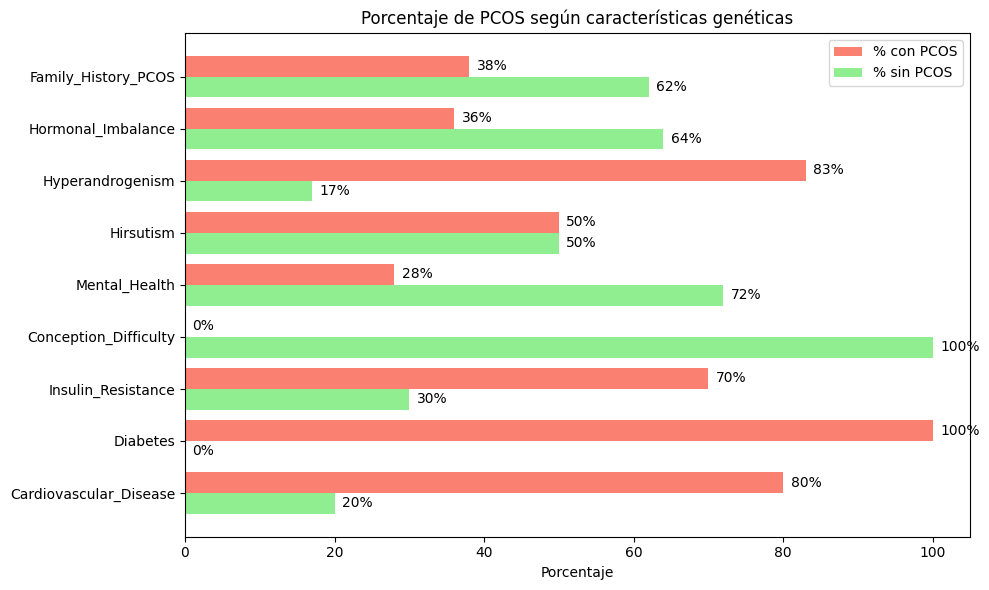

In [ ]:
#Posiciones en el eje Y
y = np.arange(len(habit_cols))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

#Barras horizontales
ax.barh(y - width/2, pcos_vals, height=width, label='% con PCOS', color='salmon')
ax.barh(y + width/2, no_pcos_vals, height=width, label='% sin PCOS', color='lightgreen')

#Texto al final de cada barra
for i in range(len(habit_cols)):
    ax.text(pcos_vals[i] + 1, y[i] - width/2, f"{pcos_vals[i]}%", va='center', fontsize=10)
    ax.text(no_pcos_vals[i] + 1, y[i] + width/2, f"{no_pcos_vals[i]}%", va='center', fontsize=10)

#Etiquetas y estilo
ax.set_xlabel('Porcentaje')
ax.set_title('Porcentaje de PCOS según características genéticas')
ax.set_yticks(y)
ax.set_yticklabels(habit_cols)
ax.invert_yaxis()
ax.legend()

plt.tight_layout()
plt.show()

Continuamos con la segunda <b>hipótesis</b>: seguir una <b>dieta equilibrada y saludable</b> se asocia con una menor probabilidad de desarrollar <b>PCOS</b>. Para ello, extraímos las siguientes columnas en una nueva tabla:

<b>Diet_Bread_Cereals:</b> Frecuencia de consumo de pan y cereales; puede influir en los niveles de glucosa y peso.

<b>Diet_Milk_Products:</b> Consumo de lácteos; aporta calcio y proteínas que pueden afectar el metabolismo.

<b>Diet_Fruits:</b> Consumo de frutas; refleja la ingesta de vitaminas y fibra.

<b>Diet_Vegetables:</b> Consumo de verduras; indica ingesta de nutrientes y fibra dietética.

<b>Diet_Starchy_Vegetables:</b> Consumo de verduras con almidón (como patatas); puede impactar en los niveles de glucosa.

<b>Diet_NonStarchy_Vegetables:</b> Consumo de verduras sin almidón; importante para vitaminas y fibra sin aportar exceso de carbohidratos.

<b>Diet_Fats:</b> Consumo de grasas; puede relacionarse con el peso y el metabolismo hormonal.

<b>Diet_Sweets:</b> Consumo de dulces; excesos pueden afectar la resistencia a la insulina y el peso.

<b>Diet_Fried_Food:</b> Consumo de alimentos fritos; ligado a hábitos poco saludables y riesgo metabólico.

<b>Diet_Tea_Coffee:</b> Consumo de té y café; puede influir en la energía y algunos aspectos hormonales.

<b>Diet_Multivitamin:</b> Uso de multivitaminas; indica suplementación que puede compensar deficiencias nutricionales.

<b>Vegetarian:</b> Indica si la participante sigue una dieta vegetariana; puede influir en la composición nutricional y hábitos de salud.

Estas columnas reflejan los <b>hábitos alimenticios</b> de las participantes, incluyendo el consumo de pan y cereales, lácteos, frutas, verduras, grasas, dulces, alimentos fritos, té y café, así como el uso de multivitaminas y la elección de ser vegetariana.

El análisis de estos datos permite evaluar si ciertos <b>patrones de alimentación</b> se relacionan con la presencia o ausencia de <b>PCOS</b>, ayudando a identificar posibles <b>factores dietéticos</b> que influyan en el síndrome.

En el dataset original, los resultados se clasificaban de 0 a 7, indicando la cantidad de días a la semana que se consumía cada alimento. Para unificar y simplificar los datos, los transformamos a una <b>escala binaria</b> de 0 a 1, indicando simplemente si se consumía o no el alimento, y creamos una función para aplicar esta transformación a todas las columnas de manera automática, evitando repetir el mismo proceso para cada una.

In [79]:
mapping_cereal = {0: 0, 1: 0.25, 2: 0.25, 3: 0.5, 4: 0.5, 5: 0.75,6: 0.75, 7: 1}
pcos_limp['Diet_Bread_Cereals'] = pcos_limp['Diet_Bread_Cereals'].map(mapping_cereal)

In [80]:
def map_diet_columns(df, cols):
    mapping = {0: 0, 1: 0.25, 2: 0.25, 3: 0.5, 4: 0.5, 5: 0.75,6: 0.75, 7: 1}

    for col in cols:
        df[col] = df[col].astype(float).astype(int).map(mapping)
    return df

map_diet_columns(pcos_limp, ['Diet_Fruits'])
map_diet_columns(pcos_limp, ['Diet_Vegetables'])
map_diet_columns(pcos_limp, ['Diet_Starchy_Vegetables'])
map_diet_columns(pcos_limp, ['Diet_NonStarchy_Vegetables'])
map_diet_columns(pcos_limp, ['Diet_Fats'])
map_diet_columns(pcos_limp, ['Diet_Sweets'])
map_diet_columns(pcos_limp, ['Diet_Fried_Food'])
map_diet_columns(pcos_limp, ['Diet_Tea_Coffee'])
map_diet_columns(pcos_limp, ['Diet_Multivitamin'])
map_diet_columns(pcos_limp, ['Vegetarian'])

,Age,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Mental_Health,Conception_Difficulty,...,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication,Weight_Range,Height_range
0,20-25,Unmarried,0.0,0.0,1,0.0,0,0.0,1,NaN,...,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,0,0,Somewhat,No.,60-70,150-160
1,0-20,Unmarried,0.0,0.0,0,0.0,0,0.0,0,NaN,...,Daily,No Exercise,Less than 30 minutes,6-8 hours,0,0,Somewhat,No.,50-60,160-170
2,0-20,Unmarried,0.0,1.0,0,0.0,0,1.0,1,NaN,...,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,1,0,Somewhat,No.,80-90,160-170
3,20-25,Unmarried,0.0,1.0,0,1.0,0,1.0,1,NaN,...,Never,No Exercise,Not Applicable,6-8 hours,1,0,Somewhat,No.,50-60,160-170
4,0-20,Unmarried,0.0,0.0,0,0.0,0,0.0,1,NaN,...,Daily,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,6-8 hours,1,0,Not at All,No.,50-60,160-170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0-20,Unmarried,0.0,0.0,0,1.0,0,1.0,1,NaN,...,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,6-8 hours,0,0,Somewhat,No.,30-50,150-160
169,20-25,Unmarried,1.0,0.0,1,1.0,0,0.0,1,NaN,...,3-4 Times a Week,High-intensity interval training (HIIT),30 minutes,6-8 hours,1,0,Somewhat,No.,80-90,170-180
170,20-25,Unmarried,1.0,1.0,1,1.0,1,1.0,1,NaN,...,Rarely,"Flexibility and balance (e.g., yoga, pilates)",Not Applicable,6-8 hours,0,0,Not Much,No.,30-50,160-170
171,0-20,Unmarried,0.0,0.0,1,1.0,0,0.0,1,NaN,...,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,Less than 6 hours,1,0,Somewhat,No.,50-60,120-130


Una vez transformados los datos, los almacenamos en un nuevo <b>DataFrame</b> y creamos un <b>CSV</b> para trabajar de manera más organizada y mantener el <b>dataset original</b> intacto.

In [81]:
pcos_diet = pcos_limp[['PCOS', 'Diet_Bread_Cereals', 'Diet_Milk_Products', 'Diet_Fruits', 'Diet_Vegetables', 'Diet_Starchy_Vegetables', 'Diet_NonStarchy_Vegetables', 'Diet_Fats', 'Diet_Sweets', 'Diet_Fried_Food', 'Diet_Tea_Coffee', 'Diet_Multivitamin', 'Vegetarian']]

In [82]:
pcos_diet.to_csv('pcos_diet.csv')

Calculamos la <b>correlación</b> entre los distintos <b>alimentos</b> consumidos por las participantes y la presencia del <b>síndrome de PCOS</b>, con el fin de identificar posibles relaciones entre los <b>hábitos alimenticios</b> y la probabilidad de desarrollar el síndrome.

In [83]:
#Reseteamos índice temporalmente
pcos_diet_reset = pcos_diet.reset_index()

#Detectar columnas de dieta automáticamente
diet_cols = [col for col in pcos_diet_reset.columns if col.startswith("Diet_")]

#Calcular correlaciones
correlaciones = pcos_diet_reset[diet_cols + ["PCOS"]].corr(numeric_only=True)["PCOS"].sort_values(ascending=False)
print("Correlaciones con PCOS:")
print(correlaciones)

Correlaciones con PCOS:
PCOS                          1.000000
Diet_Sweets                   0.146697
Diet_Fried_Food               0.129716
Diet_Multivitamin             0.098223
Diet_Starchy_Vegetables       0.073196
Diet_Fats                     0.047231
Diet_NonStarchy_Vegetables    0.020680
Diet_Bread_Cereals           -0.002401
Diet_Milk_Products           -0.012668
Diet_Tea_Coffee              -0.021273
Diet_Vegetables              -0.031352
Diet_Fruits                  -0.109758
Name: PCOS, dtype: float64


In [ ]:
habit_cols = [
    'Family_History_PCOS', 'Hormonal_Imbalance', 'Hyperandrogenism',
    'Hirsutism', 'Mental_Health', 'Conception_Difficulty',
    'Insulin_Resistance', 'Diabetes', 'Cardiovascular_Disease', 
    'PCOS_Medication'
]

# Función para calcular porcentajes y mostrar resultados
def calcular_genetica_pcos(df, columnas_genetica):
    """
    Calcula el porcentaje de PCOS y no-PCOS para cada hábito y lo imprime.
    """
    pcos_vals = []
    no_pcos_vals = []

    for col in columnas_genetica:
        temp = df[df[col].notna()]  # eliminar nulos

        if temp[col].sum() == 0:  # si no hay casos con 1
            pcos_con = 0
        else:
            pcos_con = int(round(temp[temp[col] == 1]["PCOS"].mean() * 100))
        
        pcos_vals.append(pcos_con)
        no_pcos_vals.append(100 - pcos_con)

        print(f"{col}:")
        print(f"Con PCOS: {pcos_con}")
        print(f"Sin PCOS: {100 - pcos_con}")

    return pcos_vals, no_pcos_vals
    
print(calcular_genetica_pcos(pcos_limp, habit_cols))

Family_History_PCOS:
Con PCOS: 38
Sin PCOS: 62
Hormonal_Imbalance:
Con PCOS: 36
Sin PCOS: 64
Hyperandrogenism:
Con PCOS: 83
Sin PCOS: 17
Hirsutism:
Con PCOS: 50
Sin PCOS: 50
Mental_Health:
Con PCOS: 28
Sin PCOS: 72
Conception_Difficulty:
Con PCOS: 0
Sin PCOS: 100
Insulin_Resistance:
Con PCOS: 70
Sin PCOS: 30
Diabetes:
Con PCOS: 100
Sin PCOS: 0
Cardiovascular_Disease:
Con PCOS: 80
Sin PCOS: 20


ValueError: cannot convert float NaN to integer

Se analizaron los <b>datos</b> y se generó un <b>gráfico</b> que permite visualizar de manera clara los <b>resultados</b>, facilitando así la <b>interpretación</b> de las posibles <b>relaciones</b> entre los hábitos alimenticios y la presencia del síndrome de PCOS.

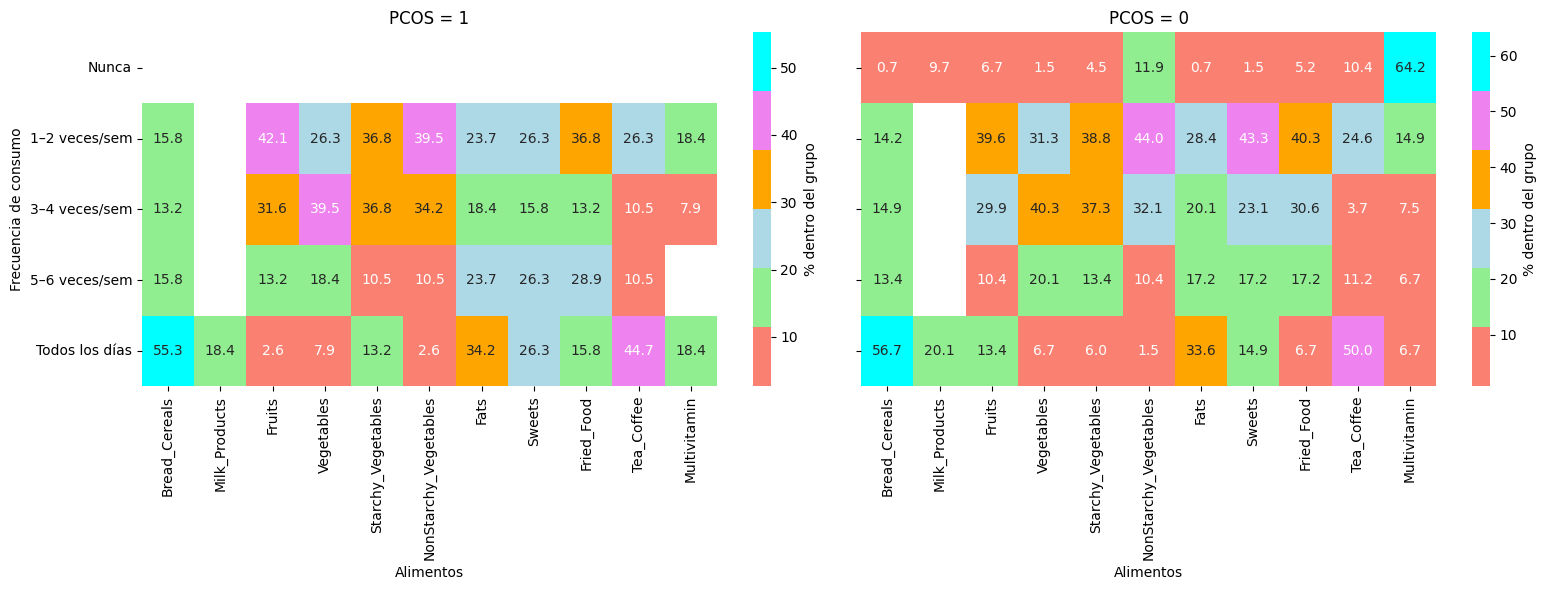

In [ ]:
pcos_diet = pcos_diet.copy()
pcos_diet["PCOS"] = pd.to_numeric(pcos_diet["PCOS"], errors="coerce")

# Columnas de dieta
diet_cols = [col for col in pcos_diet.columns if col.startswith("Diet_")]

# Traducción de valores numéricos a etiquetas
niveles = {0.00: "Nunca",0.25: "1–2 veces/sem",0.50: "3–4 veces/sem",0.75: "5–6 veces/sem",
1.00: "Todos los días"}

# Colores personalizados
colores = ["salmon", "lightgreen", "lightblue", "orange", "violet", "cyan"]

# Crear dataframes para cada grupo
resultados_pcos1 = pd.DataFrame()
resultados_pcos0 = pd.DataFrame()

for col in diet_cols:
    pcos = pcos_diet.dropna(subset=[col])

    #Grupo PCOS = 1
    pcos1 = pcos[pcos["PCOS"] == 1]
    freq1 = pcos1[col].value_counts(normalize=True) * 100
    freq1.index = [niveles.get(round(i, 2), str(i)) for i in freq1.index]
    resultados_pcos1[col.replace("Diet_", "")] = freq1

    #Grupo PCOS = 0
    pcos0 = pcos[pcos["PCOS"] == 0]
    freq0 = pcos0[col].value_counts(normalize=True) * 100
    freq0.index = [niveles.get(round(i, 2), str(i)) for i in freq0.index]
    resultados_pcos0[col.replace("Diet_", "")] = freq0

#Ordenar filas
orden_niveles = list(niveles.values())
resultados_pcos1 = resultados_pcos1.reindex(orden_niveles)
resultados_pcos0 = resultados_pcos0.reindex(orden_niveles)

#Heatmap comparativo
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.heatmap(resultados_pcos1, ax=axes[0], annot=True, fmt=".1f",
            cmap=sns.color_palette(colores), cbar_kws={'label': '% dentro del grupo'})
axes[0].set_title("PCOS = 1")
axes[0].set_xlabel("Alimentos")
axes[0].set_ylabel("Frecuencia de consumo")

sns.heatmap(resultados_pcos0, ax=axes[1], annot=True, fmt=".1f",
            cmap=sns.color_palette(colores), cbar_kws={'label': '% dentro del grupo'})
axes[1].set_title("PCOS = 0")
axes[1].set_xlabel("Alimentos")
axes[1].set_ylabel("")

plt.tight_layout()
plt.savefig("pcos_vs_no_pcos_heatmap.png", dpi=300)
plt.show()

En tercer lugar, abordamos la hipótesis de que “las personas que realizan ejercicio con mayor frecuencia tienen una menor probabilidad de presentar PCOS”. Para ello, analizamos las siguientes columnas:

<b>Exercise Yes/No:</b> Indica si la participante realiza ejercicio, permitiendo diferenciar entre personas activas y sedentarias.

<b>Exercise_Frequency:</b> Refleja la regularidad con la que se realiza ejercicio, ayudando a evaluar si la frecuencia influye en la presencia de PCOS.

<b>Exercise_Type:</b> Especifica el tipo de ejercicio practicado, proporcionando información sobre qué actividades físicas podrían estar más relacionadas con la salud hormonal y metabólica.

<b>Exercise_Duration:</b> Mide la duración de la actividad física, lo que permite analizar si el tiempo dedicado al ejercicio afecta la condición.

<b>Exercise_Benefit:</b> Registra la percepción de beneficio del ejercicio, indicando cómo la actividad física puede influir en la salud general y en los síntomas del PCOS.

Dado que estas columnas contenían valores en formato <b>string</b>, lo que dificultaba el análisis y la obtención de predicciones, convertimos la mayoría de los valores a una escala binaria de 0 a 1. La única excepción fue <b>Exercise_Type</b>, ya que consideramos que el tipo de ejercicio practicado podría tener un efecto diferenciado sobre la probabilidad de presentar PCOS.

In [ ]:
mapping_frequency = {'Never': 0,'Rarely': 0.25, '1-2 Times Week': 0.5, '3-4 Times a Week': 0.75,'Daily': 1}
pcos_limp['Exercise_Frequency'] = pcos_limp['Exercise_Frequency'].map(mapping_frequency)

In [ ]:
pcos_limp['Exercise_Type'] = pcos_limp['Exercise_Type'].replace({
    'Cardio (e.g., running, cycling, swimming)': 'Cardio',
    'Strength training (e.g., weightlifting, resistance exercises)': 'Strength',
    'Flexibility and balance (e.g., yoga, pilates)': 'Flexibility',
    'High-intensity interval training (HIIT)': 'HIIT',
    'No Exercise': 'No Exercise'})
pcos_limp['Exercise Yes/No'] = pcos_limp['Exercise_Type'].apply(lambda x: 0 if str(x).lower() == 'No Exercise' else 1)

In [ ]:
mapping_ejer = {'Not Applicable': '0','Less than 30 minutes': '1-29', '30 minutes': '30','More than 30 minutes': '31-59','30 minutes to 1 hour': '60'}
pcos_limp['Exercise_Duration'] = pcos_limp['Exercise_Duration'].map(mapping_ejer)

In [ ]:
mapping_benefit = {'Not Much': 0, 'Not at All': 0.5, 'Somewhat': 0.5,"Yes Significantly": 1,}
pcos_limp['Exercise_Benefit'] = pcos_limp['Exercise_Benefit'].map(mapping_benefit)

Al igual que en las hipótesis anteriores, creamos un <b>DataFrame</b> para almacenar estos valores, lo exportamos a un archivo <b>CSV</b> y procedimos a realizar el análisis de los datos.

In [ ]:
pcos_ejercicio = pcos_limp[['PCOS', 'Exercise Yes/No', 'Exercise_Frequency','Exercise_Type', 'Exercise_Duration', 'Exercise_Benefit']]
pcos_ejercicio.set_index('PCOS', inplace=True)
pcos_ejercicio

,Exercise Yes/No,Exercise_Frequency,Exercise_Type,Exercise_Duration,Exercise_Benefit
PCOS,,,,,
0.0,1,0.25,Cardio,30,0.5
0.0,1,1.00,No Exercise,1-29,0.5
0.0,1,0.25,Cardio,1-29,0.5
0.0,1,0.00,No Exercise,0,0.5
0.0,1,1.00,Cardio,60,0.5
...,...,...,...,...,...
0.0,1,0.25,Cardio,30,0.5
1.0,1,0.75,HIIT,30,0.5
1.0,1,0.25,Flexibility,0,0.0


In [ ]:
pcos_ejercicio.to_csv('pcos_ejercicio.csv')

Con el nuevo <b>CSV</b> y los datos organizados, procedimos a analizarlos utilizando la función <b>.mean()</b> para calcular los valores promedio y detectar tendencias en relación con la presencia de <b>PCOS</b>.

In [ ]:
pcos_ejercicio = pcos_ejercicio.reset_index()
#Asegurarse de que Exercise_Frequency sea float
pcos_ejercicio["Exercise_Frequency"] = pd.to_numeric(pcos_ejercicio["Exercise_Frequency"], errors="coerce")

#Diccionario de etiquetas
freq_labels = {0.00: "Nunca", 0.25: "Rara vez", 0.50: "1–2 veces/sem", 0.75: "3–4 veces/sem", 1.00: "Diario"}

print("\nRelación entre FRECUENCIA de ejercicio y PCOS:\n")

#Eliminar filas nulas
pcos_ejercicio2 = pcos_ejercicio.dropna(subset=["Exercise_Frequency"])

#Redondear los valores antes de agrupar
pcos_ejercicio2["Exercise_Frequency_Round"] = pcos_ejercicio2["Exercise_Frequency"].round(2)

#Agrupar y calcular % con PCOS
pcos_freq = pcos_ejercicio2.groupby("Exercise_Frequency_Round")["PCOS"].mean() * 100

#Mostrar resultados con etiquetas
for nivel, valor in pcos_freq.round(2).items():
    etiqueta = freq_labels.get(nivel, nivel)
    print(f"  {etiqueta}: {valor:.2f}% con PCOS")



Relación entre FRECUENCIA de ejercicio y PCOS:

  Nunca: 26.92% con PCOS
  Rara vez: 21.25% con PCOS
  3–4 veces/sem: 25.00% con PCOS
  Diario: 21.05% con PCOS


C:\Users\anear\AppData\Local\Temp\ipykernel_11528\1437038540.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcos_ejercicio2["Exercise_Frequency_Round"] = pcos_ejercicio2["Exercise_Frequency"].round(2)


In [ ]:
#Asegurarse de que Exercise_Duration sea numérica
pcos_ejercicio2["Exercise_Duration"] = pd.to_numeric(pcos_ejercicio2["Exercise_Duration"], errors="coerce")

#Diccionario de etiquetas
dur_labels = {0.00: "0", 0.25: "<30 min", 0.50: "30 min", 0.75: ">30 min", 1.00: "30 min–1 h"}

print("Relación entre DURACIÓN del ejercicio y PCOS:\n")

#Agrupar por duración redondeada
pcos_dur = pcos_ejercicio2.groupby(pcos_ejercicio2["Exercise_Duration"].round(2))["PCOS"].mean() * 100

#Mostrar resultados
for nivel, valor in pcos_dur.items():
    etiqueta = dur_labels.get(nivel, str(nivel))
    print(f"{etiqueta} minutos: {valor:.2f}% con PCOS")


Relación entre DURACIÓN del ejercicio y PCOS:

0 minutos: 22.06% con PCOS
30.0 minutos: 17.86% con PCOS
60.0 minutos: 27.78% con PCOS


In [ ]:
#Beneficio percibido del ejercicio
benefit_labels = {0.00: "No mucho", 0.50: "Algo / no del todo", 1.00: "Sí, significativamente" }
print("Relación entre BENEFICIO del ejercicio y PCOS:\n")
pcos_ejercicio2 = pcos_ejercicio.dropna(subset=["Exercise_Benefit"])
pcos_ben = pcos_ejercicio.groupby("Exercise_Benefit")["PCOS"].mean() * 100

for nivel, valor in pcos_ben.round(2).items():
    etiqueta = benefit_labels.get(round(nivel, 2), nivel)
    print(f"  {etiqueta}: {valor:.2f}% con PCOS")

Relación entre BENEFICIO del ejercicio y PCOS:

  No mucho: 44.44% con PCOS
  Algo / no del todo: 17.19% con PCOS
  Sí, significativamente: 30.77% con PCOS


Con los datos ya organizados, generamos un gráfico para visualizar y comunicar de manera clara los resultados del análisis, facilitando la interpretación de las tendencias observadas en relación con la presencia de PCOS.

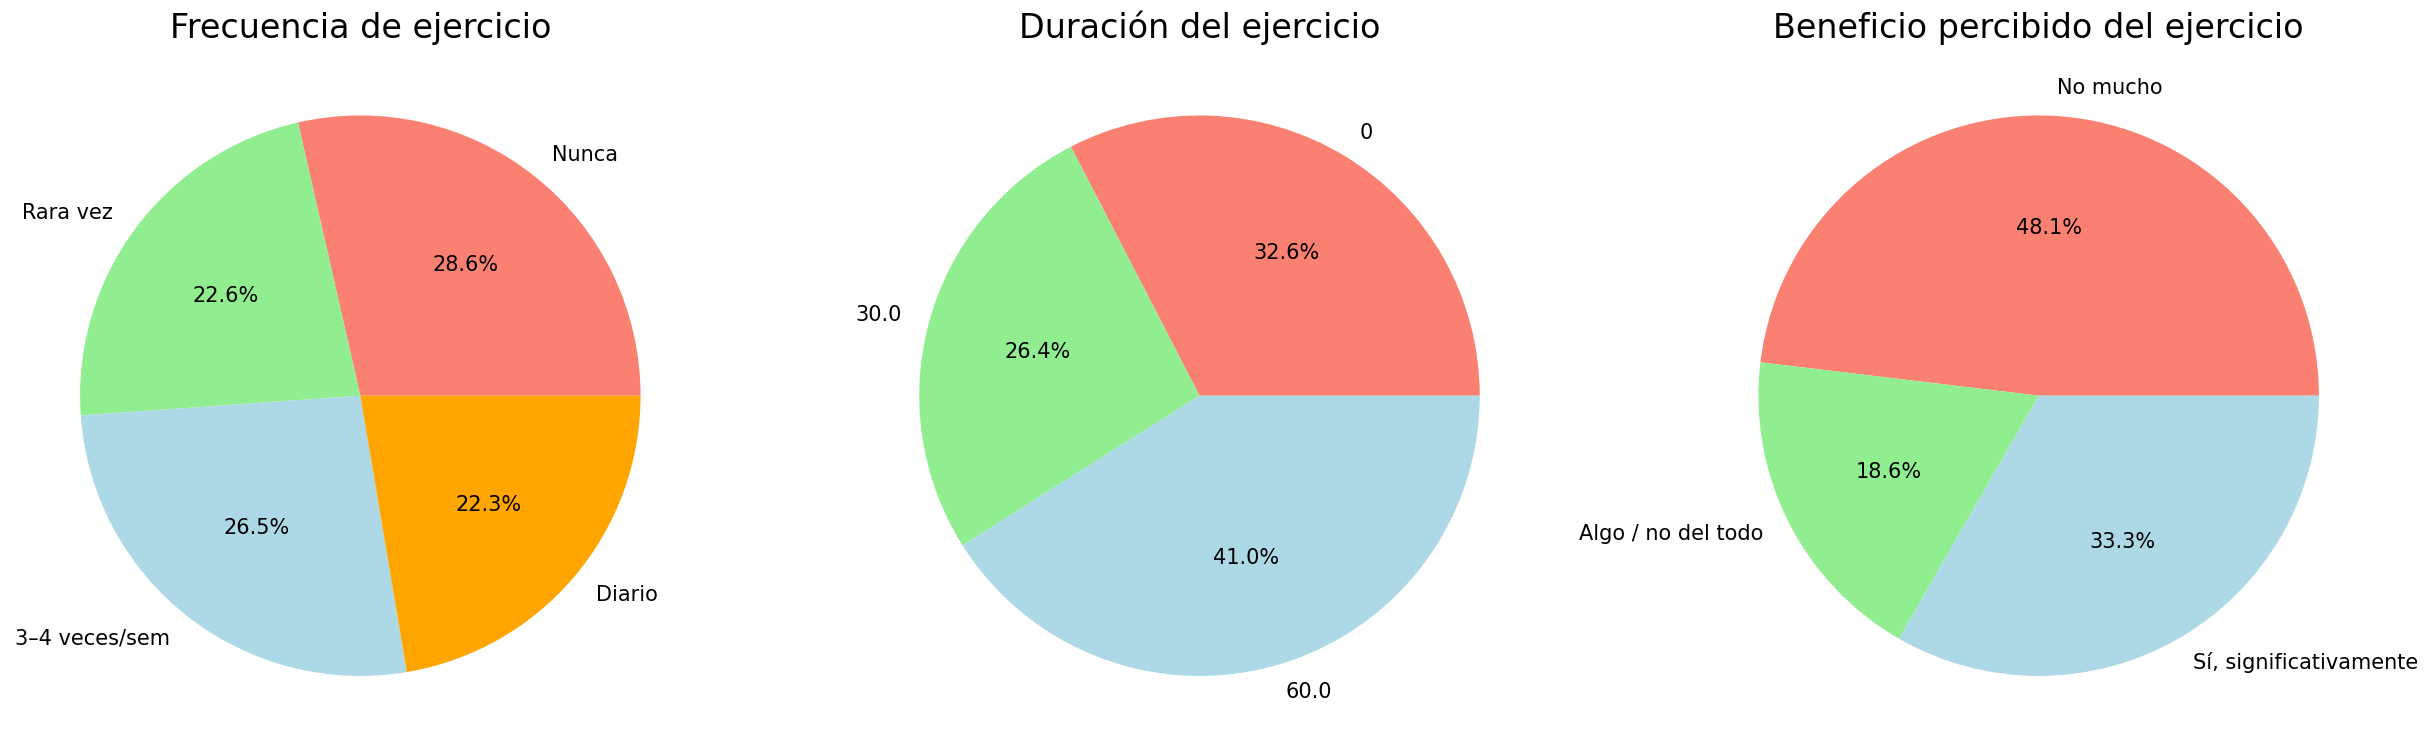

In [ ]:
mis_colores = ["salmon", "lightgreen", "lightblue", "orange", "violet"]

fig, axes = plt.subplots(1, 3, figsize=(25, 10))

#Frecuencia
axes[0].pie(
    pcos_freq.values,
    labels=pcos_freq.index.map(lambda x: freq_labels.get(round(x,2), str(x))),
    autopct="%1.1f%%",
    textprops={'fontsize': 15},
    colors=mis_colores[:len(pcos_freq)]  # colores consistentes
)
axes[0].set_title("Frecuencia de ejercicio", fontsize=24)

#Duración
axes[1].pie(
    pcos_dur.values,
    labels=pcos_dur.index.map(lambda x: dur_labels.get(round(x,2), str(x))),
    autopct="%1.1f%%",
    textprops={'fontsize': 15},
    colors=mis_colores[:len(pcos_dur)])
axes[1].set_title("Duración del ejercicio", fontsize=24)

#Beneficio percibido
axes[2].pie(
    pcos_ben.values,
    labels=pcos_ben.index.map(lambda x: benefit_labels.get(round(x,2), str(x))),
    autopct="%1.1f%%",
    textprops={'fontsize': 15},
    colors=mis_colores[:len(pcos_ben)])
axes[2].set_title("Beneficio percibido del ejercicio", fontsize=24)

plt.tight_layout()
plt.show()

Finalmente, analizamos las columnas relacionadas con los hábitos de salud para contrastar si mantener hábitos saludables —como un buen descanso, bajo nivel de estrés y no fumar— se asocia con una menor probabilidad de presentar PCOS, utilizando las siguientes columnas:

<b>Sleep_Hours:</b> Número de horas de sueño; permite evaluar si la calidad del descanso se relaciona con la presencia de PCOS.

<b>Stress_Level:</b> Nivel de estrés; ayuda a analizar cómo el estrés puede influir en la salud hormonal y en el desarrollo del síndrome.

<b>Smoking:</b> Indica si la participante fuma; proporciona información sobre hábitos de vida que podrían afectar la probabilidad de PCOS.

<b>PCOS_Medication:</b> Uso de medicación para PCOS; refleja el tratamiento recibido y su posible relación con los síntomas.

En este análisis, solo fue necesario limpiar las columnas Sleep_Hours y PCOS_Medication para convertir sus valores en datos cuantificables, ya que inicialmente se encontraban en formato string.

In [85]:
mapping_hours = {'Less than 6 hours': '0-6', '6-8 hours': '7-8','9-12 hours': '9-11', 'More than 12 hours': '12',}
pcos_limp['Sleep_Hours'] = pcos_limp['Sleep_Hours'].map(mapping_hours)

In [ ]:
mapping_medic= {
    'No.': 0,
    'Yes.. but rn i stopped medication and start organic seeds that helps me a lot': 1,
    'Glucophage ': 1,
    'I used to take medicine for almost two years, but it had no significant effects. One thing I added to my daily routine is walking for half an hour or more, which has significantly improved my periods.Also recommended my doctors.':0,
    'Yes, hormonal therapy (e.g., birth control pills)':1,
    "I took as endocrinologist prescribed me but she said that I don't have PCOS ":1,
    'Multivitamins, Inositol':1, 
    'Herbal':1,
    'Option 2':1}

pcos_limp['PCOS_Medication'] = pcos_limp['PCOS_Medication'].map(mapping_medic)

In [87]:
pcos_habitos = pcos_limp[['PCOS', 'Sleep_Hours', 'Stress_Level', 'Smoking', 'PCOS_Medication']]
pcos_habitos

,PCOS,Sleep_Hours,Stress_Level,Smoking,PCOS_Medication
0,0.0,0-6,0,0,0
1,0.0,7-8,0,0,0
2,0.0,7-8,1,0,0
3,0.0,7-8,1,0,0
4,0.0,7-8,1,0,0
...,...,...,...,...,...
168,0.0,7-8,0,0,0
169,1.0,7-8,1,0,0
170,1.0,7-8,0,0,0
171,0.0,0-6,1,0,0


In [ ]:
pcos_habitos.to_csv('pcos_habitos.csv')

Con el archivo CSV ya guardado, comenzamos a analizar los datos, calculando las medianas de las columnas para obtener una medida representativa de los valores centrales de cada variable.

In [88]:
#Análisis de las variables binarias
bin_cols = ["Stress_Level", "Smoking", "PCOS_Medication"]

for col in bin_cols:
    con = pcos_habitos[pcos_habitos[col] == 1]
    sin = pcos_habitos[pcos_habitos[col] == 0]
    
    pcos_con = con["PCOS"].mean() * 100
    pcos_sin = sin["PCOS"].mean() * 100

#2f: muestra dos decimales
    print(f"{col}:")
    print(f"% con PCOS entre quienes SÍ tienen {col}: {pcos_con:.2f}%")
    print(f"% con PCOS entre quienes NO tienen {col}: {pcos_sin:.2f}%")
    print(f"Diferencia: {(pcos_con - pcos_sin):.2f}%\n")

Stress_Level:
% con PCOS entre quienes SÍ tienen Stress_Level: 29.20%
% con PCOS entre quienes NO tienen Stress_Level: 8.47%
Diferencia: 20.73%

Smoking:
% con PCOS entre quienes SÍ tienen Smoking: 50.00%
% con PCOS entre quienes NO tienen Smoking: 21.76%
Diferencia: 28.24%

PCOS_Medication:
% con PCOS entre quienes SÍ tienen PCOS_Medication: 85.71%
% con PCOS entre quienes NO tienen PCOS_Medication: 19.39%
Diferencia: 66.32%



In [ ]:
bin_cols = ["Stress_Level", "Smoking", "PCOS_Medication"]

#Calculamos los porcentajes
resultados = {}

for col in bin_cols:
    con = pcos_habitos[pcos_habitos[col] == 1]
    sin = pcos_habitos[pcos_habitos[col] == 0]
    
    pcos_con = con["PCOS"].mean() * 100
    pcos_sin = sin["PCOS"].mean() * 100
    
    resultados[col] = [pcos_con, pcos_sin]

#Convertimos a DataFrame para graficar más fácil
#T. para invertir la tabla
res_df = pd.DataFrame(resultados, index=["Sí", "No"]).T
res_df

,Sí,No
Stress_Level,29.203540,8.474576
Smoking,50.000000,21.764706
PCOS_Medication,85.714286,19.393939


Finalmente, generamos un gráfico que permite visualizar los resultados de manera clara, facilitando la interpretación de las relaciones entre los hábitos saludables y la probabilidad de presentar PCOS.

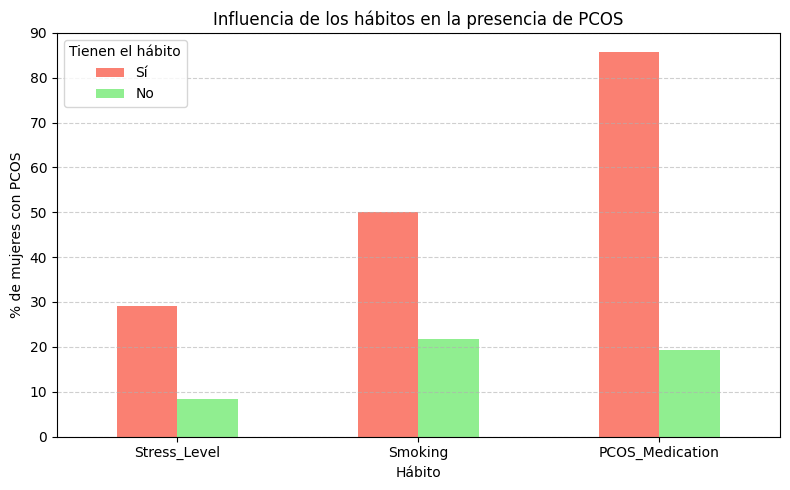

In [90]:
#Creamos el gráfico
res_df.plot(kind="bar", figsize=(8,5), color=['salmon', 'lightgreen'])

plt.title("Influencia de los hábitos en la presencia de PCOS")
plt.xlabel("Hábito")
plt.ylabel("% de mujeres con PCOS")
plt.xticks(rotation=0)
plt.legend(title="Tienen el hábito")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<b>Hipótesis 1</b>

<i>Los antecedentes familiares y ciertos factores médicos pueden influir en la aparición del PCOS.</i>

Conclusiones:

Se observa una fuerte asociación entre PCOS y factores genéticos y hormonales.

Las mujeres con PCOS presentan mayor presencia de diabetes (100%), resistencia a la insulina (70%), hiperandrogenismo (83%), y desequilibrios hormonales (64%).

También se detecta un mayor historial familiar de PCOS (38%) frente al grupo sin PCOS (62% sin antecedentes).

En conjunto, los datos apoyan la hipótesis genética, indicando que las predisposiciones médicas y familiares están relacionadas con una mayor probabilidad de desarrollar PCOS.

<b>Hipótesis 2</b>

<i>Seguir una dieta equilibrada y saludable se asocia con menor probabilidad de desarrollar PCOS.</i>

Conclusiones:

En el mapa de calor, las mujeres sin PCOS consumen más frutas, verduras y productos lácteos con mayor frecuencia.

Por el contrario, las mujeres con PCOS presentan mayor consumo diario de cereales/pan, té/café y alimentos grasos o fritos, y menor frecuencia de frutas y verduras.

Esto sugiere una relación negativa entre hábitos alimentarios saludables y la presencia de PCOS, apoyando la hipótesis: una dieta equilibrada parece asociarse con menor riesgo de PCOS.

<b>Hipótesis 3</b>

<i>Las personas que realizan ejercicio con mayor frecuencia tienen menor probabilidad de presentar PCOS.</i>

Conclusiones: 

Un 72.7% de las mujeres con PCOS nunca realiza ejercicio, y solo un 12.1% lo hace con frecuencia.
Esto sugiere una baja adherencia general a la actividad física dentro de este grupo.

Casi un 40% declara no realizar ninguna actividad física, y solo alrededor de un 13% alcanza sesiones de una hora.
Esto refuerza la idea de que la práctica de ejercicio, cuando existe, tiende a ser de corta duración.

Aun cuando la mayoría no practica ejercicio regularmente, casi el 58% percibe que el ejercicio les beneficia “algo”, y un 21% indica que les beneficia “mucho”.
Esto indica que, aunque muchas no lo practican, reconocen el potencial efecto positivo del ejercicio sobre su salud.

<b>Hipótesis 4</b>

<i>Mantener buenos hábitos —sueño adecuado, bajo estrés y no fumar— se asocia con menor probabilidad de tener PCOS.</i>

Conclusiones:

Los niveles de estrés y el tabaquismo muestran un impacto claro: las mujeres con PCOS presentan mayor prevalencia de ambos.

En particular, el 50% de las mujeres con PCOS fuman, frente a un 22% en las que no lo padecen.

Además, el estrés elevado también es más común en el grupo con PCOS (~30% frente a ~8%).

Estos resultados confirman la hipótesis, mostrando que los hábitos poco saludables (estrés y tabaco) están relacionados con una mayor incidencia de PCOS.